In [2]:
from tvDatafeed import TvDatafeed, Interval
from datetime import datetime, timedelta
import pandas as pd

In [3]:
username = 'rodrigo.tadewald'
password = open('pass', 'r').read()

tv = TvDatafeed(username, password)

In [4]:
tv.search_symbol('PETR4','BMFBOVESPA')

[{'symbol': 'PETR4',
  'description': 'PETROBRAS PN N2',
  'type': 'stock',
  'exchange': 'BMFBOVESPA',
  'currency_code': 'BRL',
  'logoid': 'brasileiro-petrobras',
  'provider_id': 'ice',
  'country': 'BR',
  'typespecs': ['preferred']},
 {'symbol': 'PETRP',
  'description': 'FUTURE OF PETR4',
  'type': 'futures',
  'exchange': 'BMFBOVESPA',
  'currency_code': 'BRL',
  'logoid': 'brasileiro-petrobras',
  'provider_id': 'ice',
  'country': 'BR',
  'contracts': [{'symbol': 'PETRP1!',
    'typespecs': ['continuous', 'synthetic'],
    'description': 'CONTINUOUS: CURRENT CONTRACT IN FRONT'},
   {'symbol': 'PETRP2!',
    'typespecs': ['continuous', 'synthetic'],
    'description': 'CONTINUOUS: NEXT CONTRACT IN FRONT'},
   {'symbol': 'PETRPX2022', 'description': 'NOV 2022'},
   {'symbol': 'PETRPZ2022', 'description': 'DEC 2022'},
   {'symbol': 'PETRPF2023', 'description': 'JAN 2023'}]},
 {'symbol': 'PETR4F',
  'description': 'PETROBRAS PN N2',
  'type': 'stock',
  'exchange': 'BMFBOVESPA',


In [6]:
df = tv.get_hist(symbol="PETR4", exchange="BMFBOVESPA", interval=Interval.in_5_minute, n_bars=5000)

In [7]:
df

symbol   open   high    low  close    volume
datetime                                                                   
2022-08-26 15:30:00  BMFBOVESPA:PETR4  33.51  33.52  33.47  33.48  654700.0
2022-08-26 15:35:00  BMFBOVESPA:PETR4  33.48  33.50  33.44  33.49  346600.0
2022-08-26 15:40:00  BMFBOVESPA:PETR4  33.50  33.52  33.47  33.48  437400.0
2022-08-26 15:45:00  BMFBOVESPA:PETR4  33.49  33.49  33.41  33.42  631500.0
2022-08-26 15:50:00  BMFBOVESPA:PETR4  33.42  33.46  33.40  33.43  337300.0
...                               ...    ...    ...    ...    ...       ...
2022-11-18 12:25:00  BMFBOVESPA:PETR4  26.44  26.52  26.42  26.50  575800.0
2022-11-18 12:30:00  BMFBOVESPA:PETR4  26.51  26.52  26.45  26.48  589400.0
2022-11-18 12:35:00  BMFBOVESPA:PETR4  26.48  26.55  26.48  26.50  604600.0
2022-11-18 12:40:00  BMFBOVESPA:PETR4  26.50  26.62  26.50  26.55  782900.0
2022-11-18 12:45:00  BMFBOVESPA:PETR4  26.54  26.57  26.52  26.57  557500.0

[5000 rows x 6 columns]

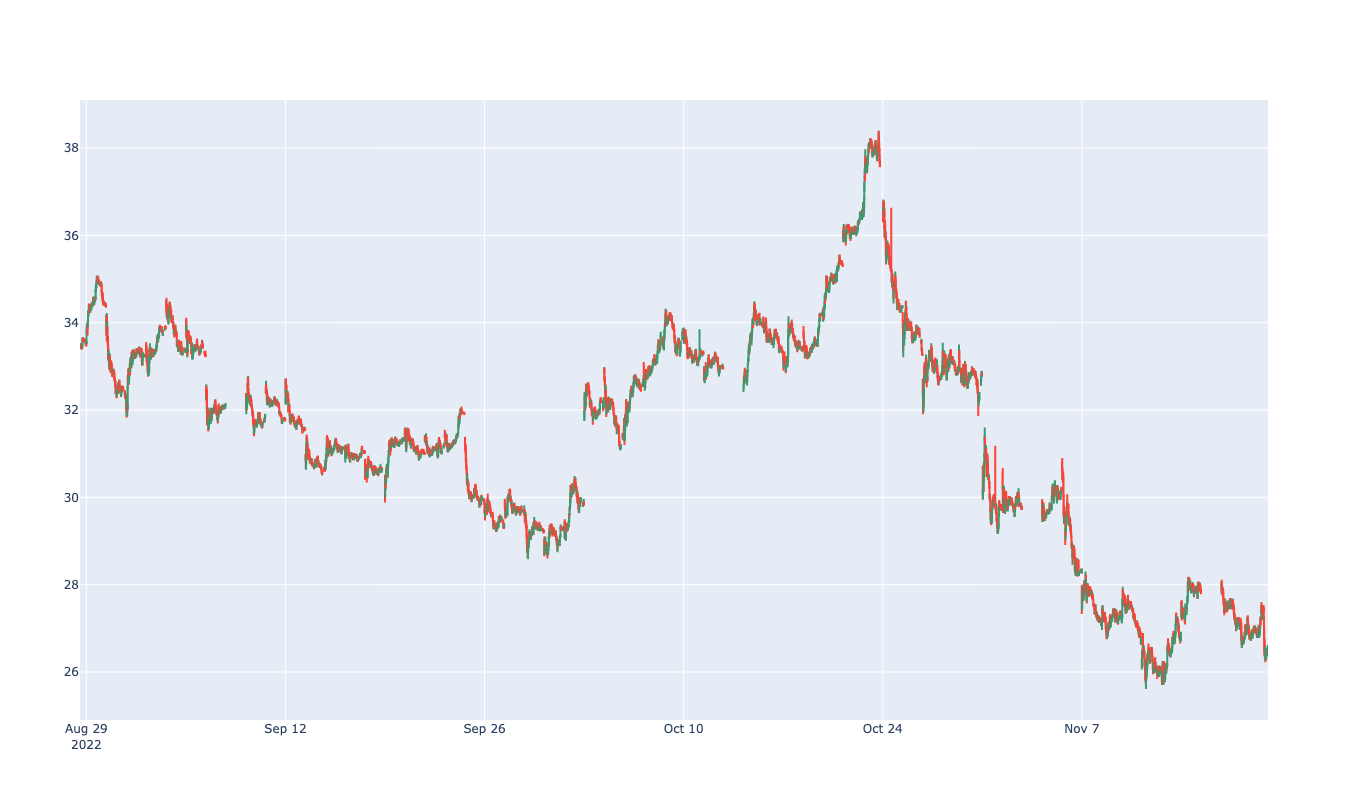

In [15]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                        open=df.open,
                                     high=df.high,
                                     low=df.low,
                                     close=df.close)])

fig.update_xaxes(rangebreaks=[dict(bounds=[18, 10], pattern='hour'), dict(bounds=['sat', 'mon'])])
fig.update_layout(height=800, xaxis_rangeslider_visible=False)

fig.show()

In [16]:
df

symbol   open   high    low  close    volume
datetime                                                                   
2022-08-26 15:30:00  BMFBOVESPA:PETR4  33.51  33.52  33.47  33.48  654700.0
2022-08-26 15:35:00  BMFBOVESPA:PETR4  33.48  33.50  33.44  33.49  346600.0
2022-08-26 15:40:00  BMFBOVESPA:PETR4  33.50  33.52  33.47  33.48  437400.0
2022-08-26 15:45:00  BMFBOVESPA:PETR4  33.49  33.49  33.41  33.42  631500.0
2022-08-26 15:50:00  BMFBOVESPA:PETR4  33.42  33.46  33.40  33.43  337300.0
...                               ...    ...    ...    ...    ...       ...
2022-11-18 12:25:00  BMFBOVESPA:PETR4  26.44  26.52  26.42  26.50  575800.0
2022-11-18 12:30:00  BMFBOVESPA:PETR4  26.51  26.52  26.45  26.48  589400.0
2022-11-18 12:35:00  BMFBOVESPA:PETR4  26.48  26.55  26.48  26.50  604600.0
2022-11-18 12:40:00  BMFBOVESPA:PETR4  26.50  26.62  26.50  26.55  782900.0
2022-11-18 12:45:00  BMFBOVESPA:PETR4  26.54  26.57  26.52  26.57  557500.0

[5000 rows x 6 columns]

### Cálculo do RSI (Relative Strenght Index) - IFR

In [37]:
periods = 14

close_ret = df["close"] / df["close"].shift(1) - 1

up = close_ret.clip(lower=0)
down = -1 * close_ret.clip(upper=0)

ma_up = up.rolling(window=periods).mean()
ma_down = down.rolling(window=periods).mean()

rs = ma_up / ma_down
df["rsi"] = 100 - (100 / (1 + rs))

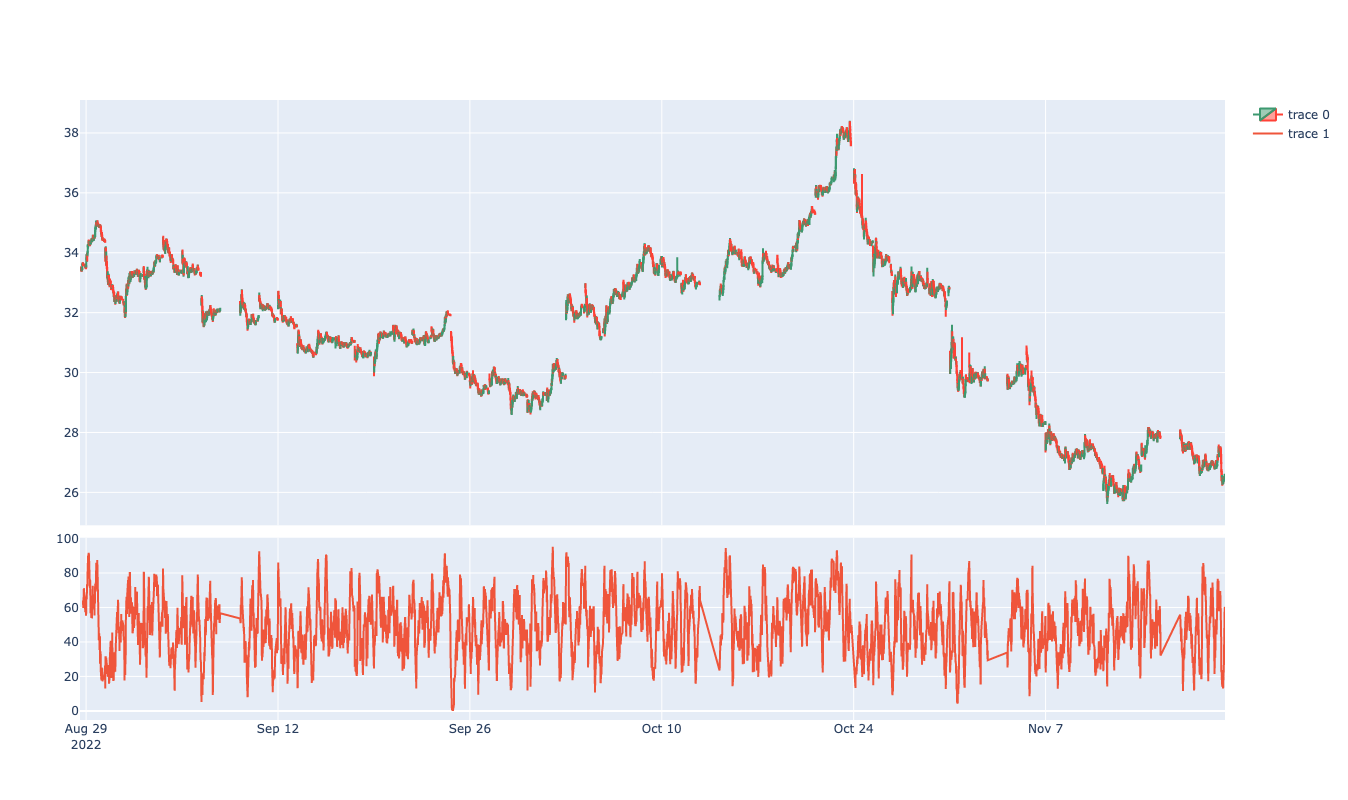

In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, row_heights=[0.7, 0.3], vertical_spacing=0.02, shared_xaxes=True)


fig.add_trace(go.Candlestick(x=df.index,
                                        open=df.open,
                                     high=df.high,
                                     low=df.low,
                                     close=df.close), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                y=df['rsi']), row=2, col=1)

fig.update_xaxes(rangebreaks=[dict(bounds=[18, 10], pattern='hour'), dict(bounds=['sat', 'mon'])])
fig.update_layout(height=800, xaxis_rangeslider_visible=False)

fig.show()

In [43]:
df.tail(20)

symbol   open   high    low  close     volume  \
datetime                                                                       
2022-11-18 11:10:00  BMFBOVESPA:PETR4  27.25  27.27  26.95  26.98  2670200.0   
2022-11-18 11:15:00  BMFBOVESPA:PETR4  26.98  27.00  26.67  26.75  3334600.0   
2022-11-18 11:20:00  BMFBOVESPA:PETR4  26.73  26.78  26.38  26.59  4425900.0   
2022-11-18 11:25:00  BMFBOVESPA:PETR4  26.61  26.72  26.51  26.52  1358400.0   
2022-11-18 11:30:00  BMFBOVESPA:PETR4  26.51  26.60  26.34  26.40  2792100.0   
2022-11-18 11:35:00  BMFBOVESPA:PETR4  26.39  26.58  26.39  26.46  1881400.0   
2022-11-18 11:40:00  BMFBOVESPA:PETR4  26.46  26.49  26.22  26.28  3626000.0   
2022-11-18 11:45:00  BMFBOVESPA:PETR4  26.28  26.45  26.28  26.38  2112500.0   
2022-11-18 11:50:00  BMFBOVESPA:PETR4  26.38  26.50  26.34  26.42  1096600.0   
2022-11-18 11:55:00  BMFBOVESPA:PETR4  26.42  26.47  26.35  26.37   705000.0   
2022-11-18 12:00:00  BMFBOVESPA:PETR4  26.36  26.38  26.27  26.33  1126500.0   
2022-11-18 12:05:00  BMFBOVESPA:PETR4  26.33  26.38  26.28  26.37   832600.0   
2022-11-18 12:10:00  BMFBOVESPA:PETR4  26.37  26.48  26.35  26.39   797200.0   
2022-11-18 12:15:00  BMFBOVESPA:PETR4  26.39  26.48  26.37  26.42  1020400.0   
2022-11-18 12:20:00  BMFBOVESPA:PETR4  26.41  26.49  26.41  26.44   602500.0   
2022-11-18 12:25:00  BMFBOVESPA:PETR4  26.44  26.52  26.42  26.50   575800.0   
2022-11-18 12:30:00  BMFBOVESPA:PETR4  26.51  26.52  26.45  26.48   589400.0   
2022-11-18 12:35:00  BMFBOVESPA:PETR4  26.48  26.55  26.48  26.50   604600.0   
2022-11-18 12:40:00  BMFBOVESPA:PETR4  26.50  26.62  26.50  26.55   782900.0   
2022-11-18 12:45:00  BMFBOVESPA:PETR4  26.54  26.57  26.52  26.57   557500.0   

                           rsi  
datetime                        
2022-11-18 11:10:00  46.315554  
2022-11-18 11:15:00  23.000366  
2022-11-18 11:20:00  22.447544  
2022-11-18 11:25:00  23.743555  
2022-11-18 11:30:00  17.231301  
2022-11-18 11:35:00  15.532453  
2022-11-18 11:40:00  14.030043  
2022-11-18 11:45:00  15.378523  
2022-11-18 11:50:00  17.080528  
2022-11-18 11:55:00  16.534085  
2022-11-18 12:00:00  12.984737  
2022-11-18 12:05:00  15.961592  
2022-11-18 12:10:00  17.063291  
2022-11-18 12:15:00  20.710100  
2022-11-18 12:20:00  26.959811  
2022-11-18 12:25:00  37.540767  
2022-11-18 12:30:00  43.641988  
2022-11-18 12:35:00  48.841695  
2022-11-18 12:40:00  60.328112  
2022-11-18 12:45:00  58.020737

In [44]:
def get_rsi(window):
    close_ret = df["close"] / df["close"].shift(1) - 1

    up = close_ret.clip(lower=0)
    down = -1 * close_ret.clip(upper=0)

    ma_up = up.rolling(window=window).mean()
    ma_down = down.rolling(window=window).mean()

    rs = ma_up / ma_down
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [80]:
window = 14
up_exit = 70
down_entry = 30
bet_size = 100

df["rsi"] = get_rsi(window)

# Estratégia
list_trades = []
t = 0

for idx, row in df.iterrows():
    if row['rsi'] <= down_entry and t == 0:
        list_trades += [{'price': row['close'], 'time': idx, 'kind':'buy', 'quantity': bet_size}]
        t = 1
    
    elif row['rsi'] >= up_exit and t == 1:
        list_trades += [{'price': row['close'], 'time': idx, 'kind':'sell', 'quantity': -bet_size}]
        t = 0
        
df_trades_raw = pd.DataFrame(list_trades)
df_trades_raw.set_index('time', inplace=True)

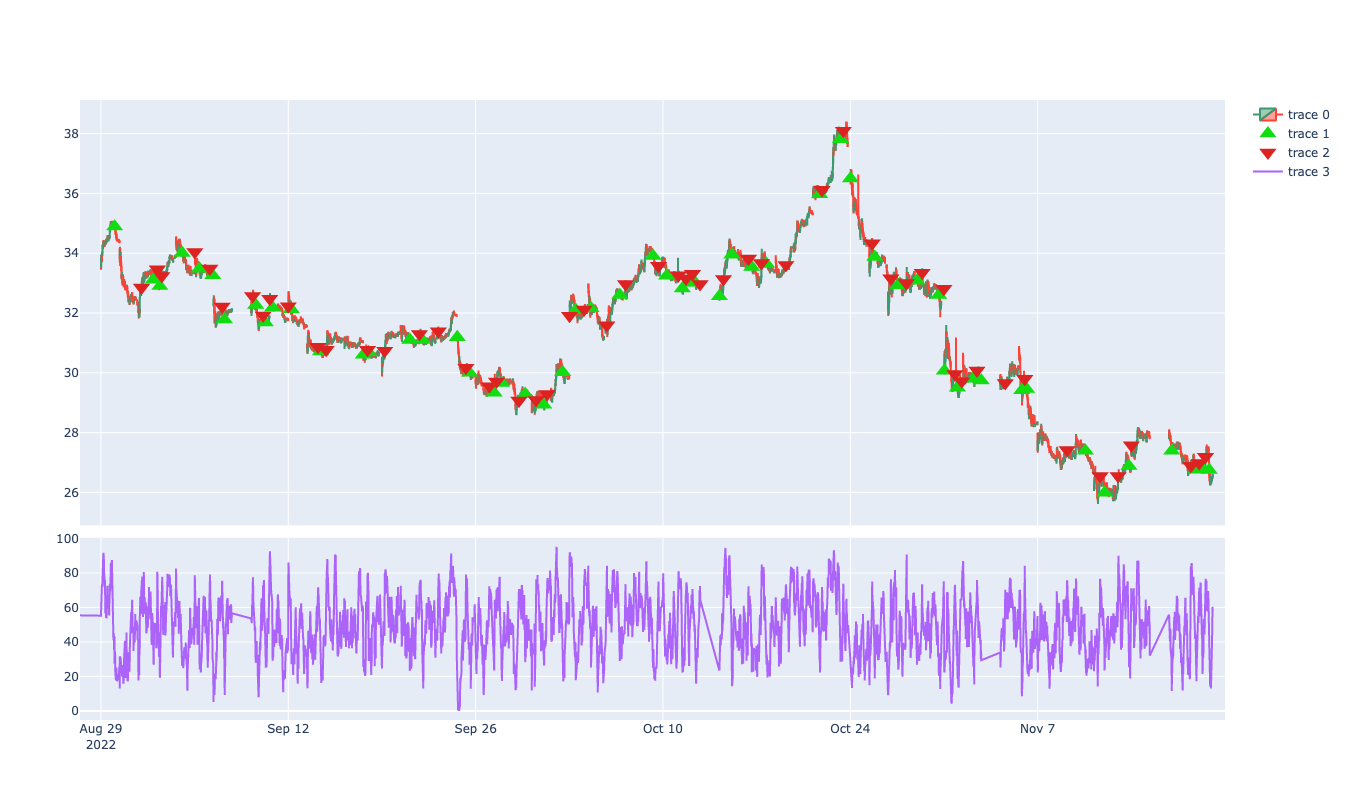

In [60]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_buys = df_trades_raw[df_trades_raw['kind'] == 'buy']
df_sells = df_trades_raw[df_trades_raw['kind'] == 'sell']

fig = make_subplots(rows=2, cols=1, row_heights=[0.7, 0.3], vertical_spacing=0.02, shared_xaxes=True)


fig.add_trace(go.Candlestick(x=df.index,
                                        open=df.open,
                                     high=df.high,
                                     low=df.low,
                                     close=df.close), row=1, col=1)


fig.add_trace(go.Scatter(x=df_buys.index, y=df_buys["price"], marker_color='#11dd11', marker_size=15,
                mode="markers", marker_symbol= 'triangle-up'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_sells.index,y=df_sells['price'], marker_color='#dd2222',  marker_size=15,
                 mode="markers", marker_symbol= 'triangle-down'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                y=df['rsi']), row=2, col=1)

fig.update_xaxes(rangebreaks=[dict(bounds=[18, 10], pattern='hour'), dict(bounds=['sat', 'mon'])])
fig.update_layout(height=800, xaxis_rangeslider_visible=False)

fig.show()

### Marcação a mercado

In [81]:
df_trades = df_trades_raw.join(df["close"], how='outer')

In [105]:
df_trades["position"] = df_trades["quantity"].shift(1).fillna(0).cumsum()

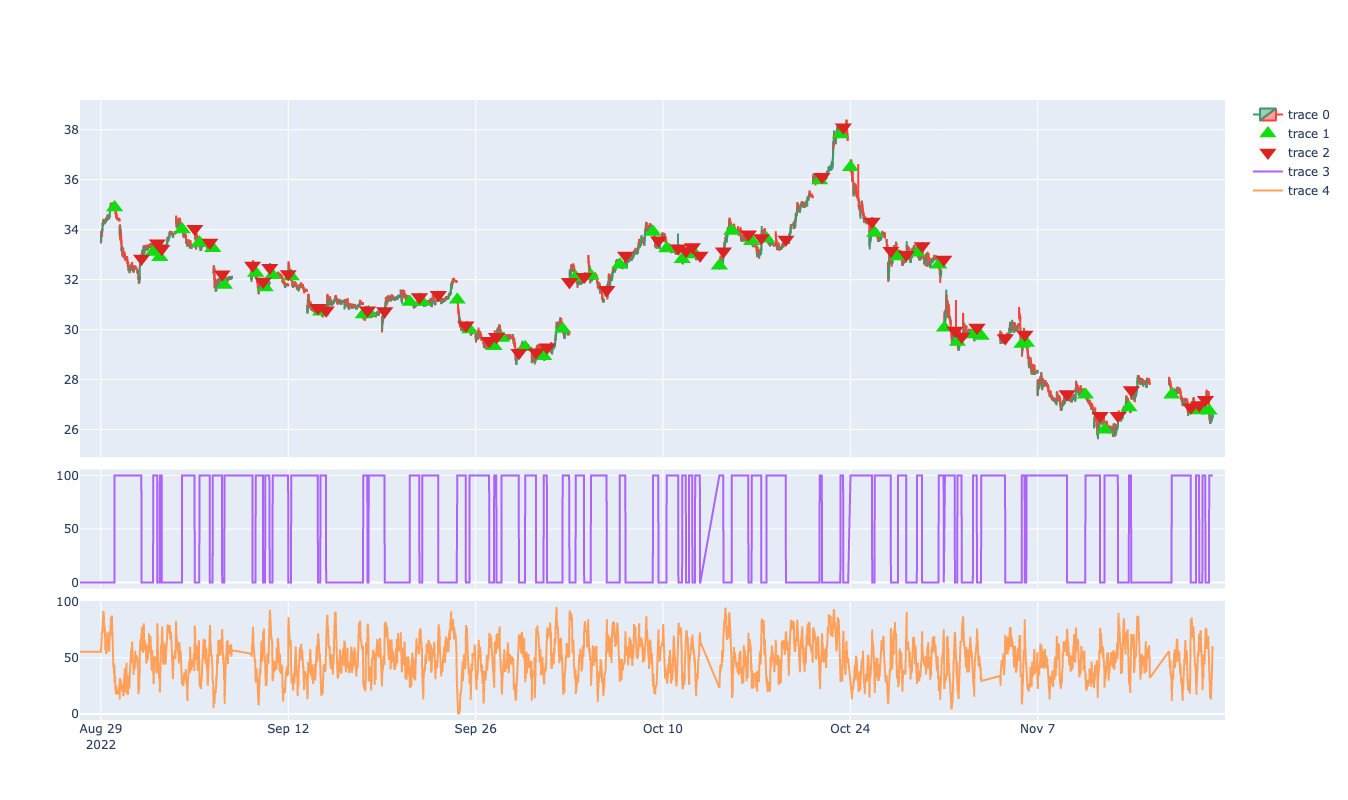

In [86]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_buys = df_trades_raw[df_trades_raw['kind'] == 'buy']
df_sells = df_trades_raw[df_trades_raw['kind'] == 'sell']

fig = make_subplots(rows=3, cols=1, row_heights=[0.6, 0.2, 0.2], vertical_spacing=0.02, shared_xaxes=True)


fig.add_trace(go.Candlestick(x=df.index,
                                        open=df.open,
                                     high=df.high,
                                     low=df.low,
                                     close=df.close), row=1, col=1)


fig.add_trace(go.Scatter(x=df_buys.index, y=df_buys["price"], marker_color='#11dd11', marker_size=15,
                mode="markers", marker_symbol= 'triangle-up'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_sells.index,y=df_sells['price'], marker_color='#dd2222',  marker_size=15,
                 mode="markers", marker_symbol= 'triangle-down'), row=1, col=1)



fig.add_trace(go.Scatter(x=df_trades.index,
                y=df_trades['position']), row=2, col=1)

fig.add_trace(go.Scatter(x=df.index,
                y=df['rsi']), row=3, col=1)

fig.update_xaxes(rangebreaks=[dict(bounds=[18, 10], pattern='hour'), dict(bounds=['sat', 'mon'])])
fig.update_layout(height=800, xaxis_rangeslider_visible=False)

fig.show()

In [106]:
df_trades["ret_market"] = df_trades["close"] - df_trades["close"].shift(1)
df_trades["ret"] = df_trades["ret_market"] * df_trades["position"]
df_trades["ret_cum"] = df_trades["ret"].cumsum()

<AxesSubplot: >

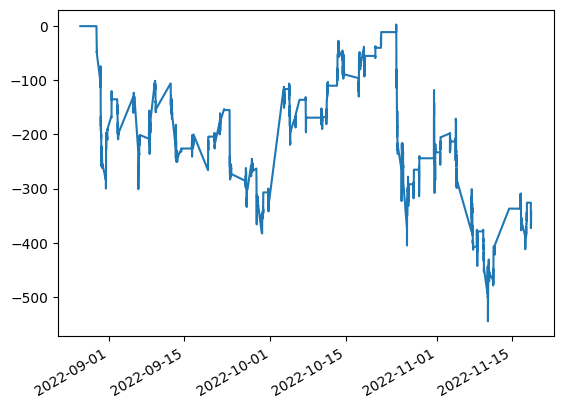

In [107]:
df_trades["ret_cum"].plot()

In [101]:
df_trades[(df_trades["position"] == 0) & (df_trades["position"].shift(1) > 0)].index[0]

Timestamp('2022-08-31 11:20:00')

In [104]:
df_trades.loc[df_trades.index <= df_trades[(df_trades["position"] == 0) & (df_trades["position"].shift(1) > 0)].index[0]].tail(20)

price  kind  quantity  close  position  ret_market   ret  \
2022-08-30 17:45:00    NaN   NaN       NaN  32.27     100.0       -0.01  -1.0   
2022-08-30 17:50:00    NaN   NaN       NaN  32.32     100.0        0.05   5.0   
2022-08-30 17:55:00    NaN   NaN       NaN  32.35     100.0        0.03   3.0   
2022-08-31 10:00:00    NaN   NaN       NaN  32.05     100.0       -0.30 -30.0   
2022-08-31 10:05:00    NaN   NaN       NaN  32.13     100.0        0.08   8.0   
2022-08-31 10:10:00    NaN   NaN       NaN  31.89     100.0       -0.24 -24.0   
2022-08-31 10:15:00    NaN   NaN       NaN  31.94     100.0        0.05   5.0   
2022-08-31 10:20:00    NaN   NaN       NaN  31.92     100.0       -0.02  -2.0   
2022-08-31 10:25:00    NaN   NaN       NaN  32.08     100.0        0.16  16.0   
2022-08-31 10:30:00    NaN   NaN       NaN  32.04     100.0       -0.04  -4.0   
2022-08-31 10:35:00    NaN   NaN       NaN  32.52     100.0        0.48  48.0   
2022-08-31 10:40:00    NaN   NaN       NaN  32.75     100.0        0.23  23.0   
2022-08-31 10:45:00    NaN   NaN       NaN  32.70     100.0       -0.05  -5.0   
2022-08-31 10:50:00    NaN   NaN       NaN  32.91     100.0        0.21  21.0   
2022-08-31 10:55:00    NaN   NaN       NaN  32.77     100.0       -0.14 -14.0   
2022-08-31 11:00:00    NaN   NaN       NaN  32.61     100.0       -0.16 -16.0   
2022-08-31 11:05:00    NaN   NaN       NaN  32.61     100.0        0.00   0.0   
2022-08-31 11:10:00    NaN   NaN       NaN  32.75     100.0        0.14  14.0   
2022-08-31 11:15:00    NaN   NaN       NaN  32.92     100.0        0.17  17.0   
2022-08-31 11:20:00  32.85  sell    -100.0  32.85       0.0       -0.07  -0.0   

                     ret_cum  
2022-08-30 17:45:00   -265.0  
2022-08-30 17:50:00   -260.0  
2022-08-30 17:55:00   -257.0  
2022-08-31 10:00:00   -287.0  
2022-08-31 10:05:00   -279.0  
2022-08-31 10:10:00   -303.0  
2022-08-31 10:15:00   -298.0  
2022-08-31 10:20:00   -300.0  
2022-08-31 10:25:00   -284.0  
2022-08-31 10:30:00   -288.0  
2022-08-31 10:35:00   -240.0  
2022-08-31 10:40:00   -217.0  
2022-08-31 10:45:00   -222.0  
2022-08-31 10:50:00   -201.0  
2022-08-31 10:55:00   -215.0  
2022-08-31 11:00:00   -231.0  
2022-08-31 11:05:00   -231.0  
2022-08-31 11:10:00   -217.0  
2022-08-31 11:15:00   -200.0  
2022-08-31 11:20:00   -200.0

<AxesSubplot: >

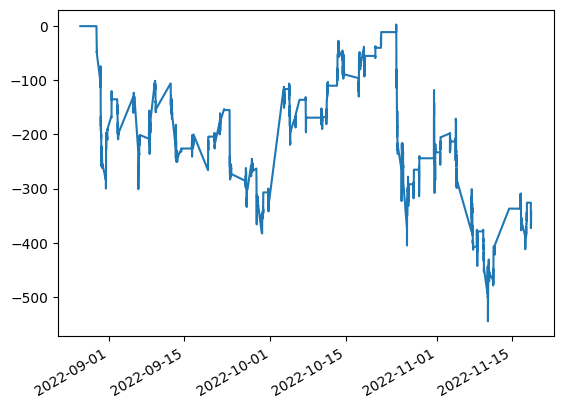

In [108]:
df_trades["ret_cum"].plot()

## Mensuração de performance

### Drawdown

In [124]:
initial_capital = 1000

df_trades["ret_cum"] = df_trades["ret"].cumsum()
df_trades["ret_cum"] += initial_capital

In [125]:
df_trades["max_cum"] = df_trades["ret_cum"].cummax()
df_trades["drawdown"] = df_trades["ret_cum"] / df_trades["max_cum"] - 1

In [126]:
import matplotlib.pyplot as plt

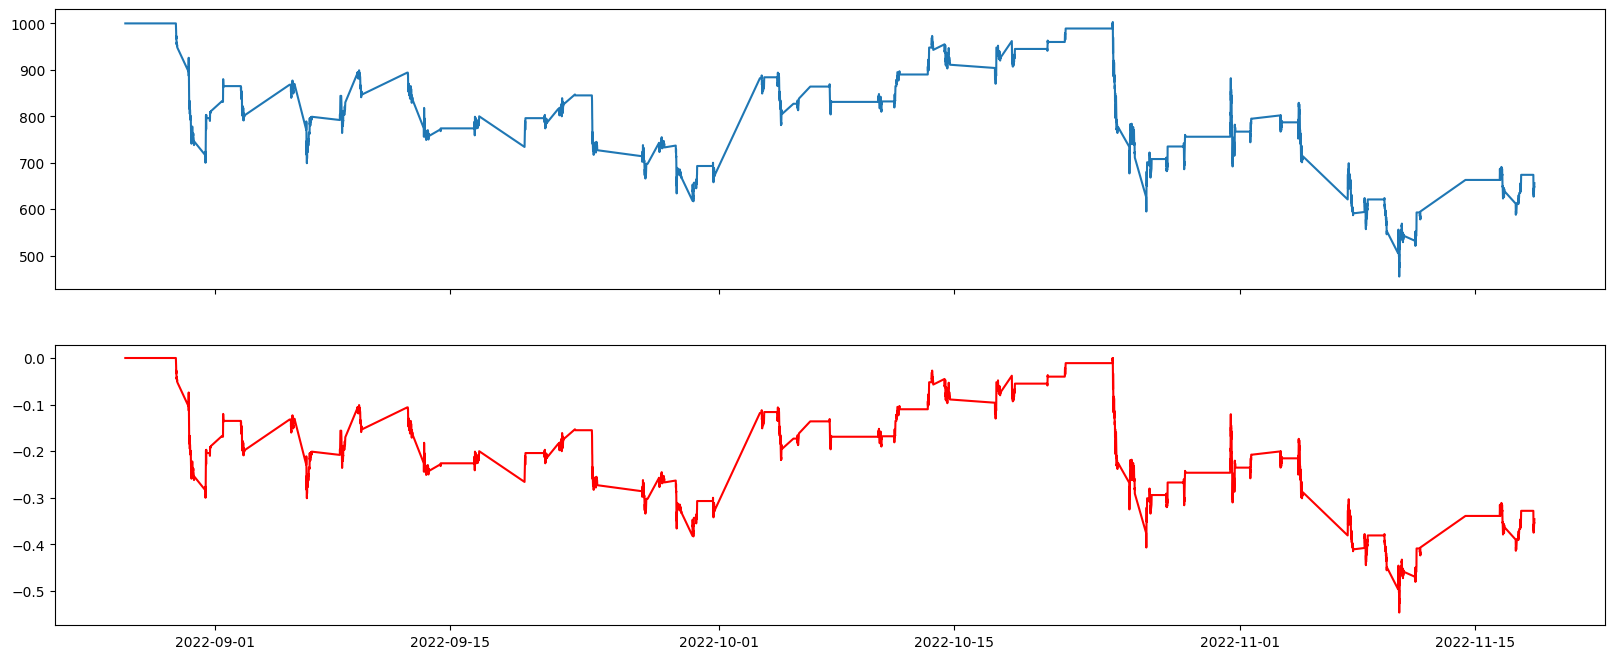

In [127]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(20, 8))

ax[0].plot(df_trades["ret_cum"])
ax[1].plot(df_trades["drawdown"], color="red")

### Underwater Period

In [128]:
df_trades['underwater'] = df_trades['ret_cum'] < df_trades['max_cum']

In [136]:
df_trades['underwater'].sum() * 5 / 60 / 8

51.083333333333336

In [135]:
df_trades

price kind  quantity  close  position  ret_market  ret  \
2022-08-26 15:30:00    NaN  NaN       NaN  33.48       0.0         NaN  NaN   
2022-08-26 15:35:00    NaN  NaN       NaN  33.49       0.0        0.01  0.0   
2022-08-26 15:40:00    NaN  NaN       NaN  33.48       0.0       -0.01 -0.0   
2022-08-26 15:45:00    NaN  NaN       NaN  33.42       0.0       -0.06 -0.0   
2022-08-26 15:50:00    NaN  NaN       NaN  33.43       0.0        0.01  0.0   
...                    ...  ...       ...    ...       ...         ...  ...   
2022-11-18 12:25:00    NaN  NaN       NaN  26.50     100.0        0.06  6.0   
2022-11-18 12:30:00    NaN  NaN       NaN  26.48     100.0       -0.02 -2.0   
2022-11-18 12:35:00    NaN  NaN       NaN  26.50     100.0        0.02  2.0   
2022-11-18 12:40:00    NaN  NaN       NaN  26.55     100.0        0.05  5.0   
2022-11-18 12:45:00    NaN  NaN       NaN  26.57     100.0        0.02  2.0   

                     ret_cum  max_cum  drawdown  underwater  
2022-08-26 15:30:00      NaN      NaN       NaN       False  
2022-08-26 15:35:00   1000.0   1000.0  0.000000       False  
2022-08-26 15:40:00   1000.0   1000.0  0.000000       False  
2022-08-26 15:45:00   1000.0   1000.0  0.000000       False  
2022-08-26 15:50:00   1000.0   1000.0  0.000000       False  
...                      ...      ...       ...         ...  
2022-11-18 12:25:00    649.0   1003.0 -0.352941        True  
2022-11-18 12:30:00    647.0   1003.0 -0.354935        True  
2022-11-18 12:35:00    649.0   1003.0 -0.352941        True  
2022-11-18 12:40:00    654.0   1003.0 -0.347956        True  
2022-11-18 12:45:00    656.0   1003.0 -0.345962        True  

[5000 rows x 11 columns]

### Índice Sharpe

In [143]:
df_trades["ret"].groupby(df_trades.index.date).sum().mean() / df_trades["ret"].groupby(df_trades.index.date).sum().std()

-0.09187375198436296

## Otimização de parâmetros

In [ ]:
window = 14
up_exit = 70
down_entry = 30


for window in [14, 21]:
    for up_exit in [50, 60, 70]:
        for down_entry in [20, 30, 40]:
            bet_size = 100
            df["rsi"] = get_rsi(window)

            # Estratégia
            list_trades = []
            t = 0

            for idx, row in df.iterrows():
                if row['rsi'] <= down_entry and t == 0:
                    list_trades += [{'price': row['close'], 'time': idx, 'kind':'buy', 'quantity': bet_size}]
                    t = 1

                elif row['rsi'] >= up_exit and t == 1:
                    list_trades += [{'price': row['close'], 'time': idx, 'kind':'sell', 'quantity': -bet_size}]
                    t = 0

            df_trades_raw = pd.DataFrame(list_trades)
            df_trades_raw.set_index('time', inplace=True)